In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import tkinter as tk
from tkinter import filedialog as fd


In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - CATASTRO/CATASTRO/Cosecha2023.shp'

In [4]:
catastro_avance = gpd.read_file(file_name)

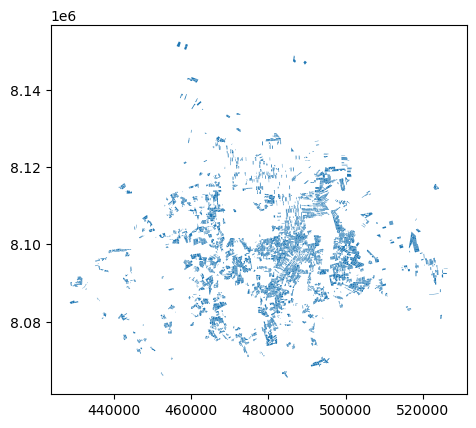

In [6]:
catastro_avance.plot()
plt.show()

In [7]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".xlsx", ".xlsx")])
root.destroy()

In [8]:
file_name

'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - AVANCE COSECHA/2023/ANALISIS DE CAÑA EN CAMPO 2023/RENDIMIENTO AVANCE 270523.xlsx'

In [9]:
data_avance = pd.read_excel(file_name)

C:\Users\UTEA\anaconda3\envs\informes_utea\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\UTEA\anaconda3\envs\informes_utea\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
data_avance.head(3)

,INS,GRUPO,COD COS,CODIGO CAÑERO,NOMBRE CAÑERO,TN COMPROMISO GRUPAL,TN COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,TN ENTREGA INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2023,RENDIMIENTO 2022,RENDIMIENTO 2021,DIFERENCIA,OBSERVACION
0,50,1.0,30,577,AGUILERA MARIA INGRID WENDE DE,61993.32,13433.25,857.64,205.82,13247.95,0.00,0.2137,125.71,48.76,0.146577,105.385013,72.361904,78.099309,0.067123,NO CUBIERTO
1,50,1.0,30,75,AGUILERA TARADELLES NELSON MARIANO,61993.32,26992.97,857.64,525.40,13247.95,20.45,0.2137,125.71,76.95,0.146577,105.385013,72.361904,78.099309,0.067123,NO CUBIERTO
2,50,1.0,30,794,AGUILERA WENDE MARIANO,61993.32,14584.70,857.64,92.60,13247.95,13227.50,0.2137,125.71,0.00,0.146577,105.385013,72.361904,78.099309,0.067123,NO CUBIERTO


In [11]:
data_avance.columns

Index(['INS', 'GRUPO', 'COD COS', 'CODIGO CAÑERO ', 'NOMBRE CAÑERO',
       'TN COMPROMISO GRUPAL', 'TN COMPROMISO INDIVIDUAL',
       'HA CANHA POR GRUPO', 'HA CANHA INDIVIDUAL', 'TN ENTREGA GRUPAL',
       'TN ENTREGA INDIVIDUAL', '% ENTREGA GRUPAL', 'HA COSECHA GRUPAL',
       'HA COSECHA INDIVIDUAL', '% COSECHA GRUPAL', 'RENDIMIENTO 2023',
       'RENDIMIENTO 2022', 'RENDIMIENTO 2021', 'DIFERENCIA', 'OBSERVACION'],
      dtype='object')

In [12]:
# extraer codigos de cosecha
codigos_cosecha = list(set(data_avance['COD COS']))

In [13]:
print(codigos_cosecha)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

In [89]:
cod_co = codigos_cosecha[39]

In [90]:
grupo = data_avance[data_avance['COD COS'] == cod_co]

In [91]:
grupo

,INS,GRUPO,COD COS,CODIGO CAÑERO,NOMBRE CAÑERO,TN COMPROMISO GRUPAL,TN COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,TN ENTREGA INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2023,RENDIMIENTO 2022,RENDIMIENTO 2021,DIFERENCIA,OBSERVACION
15,50,37.0,41,41594,AGROPECUARIA CAMPO DULCE S.R.L.,40000.0,40000.0,632.03,632.03,6398.53,6398.53,0.159963,109.46,109.46,0.173188,58.455418,53.327902,51.342076,-0.013225,NaN


In [92]:
lista_ca = grupo[['CODIGO CAÑERO ', 'COD COS', 'NOMBRE CAÑERO', 'TN COMPROMISO INDIVIDUAL', 'TN ENTREGA INDIVIDUAL']]
lista_ca

,CODIGO CAÑERO,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL
15,41594,41,AGROPECUARIA CAMPO DULCE S.R.L.,40000.0,6398.53


In [93]:
catastro_avance.head(3)

,id,unidad_01,unidad_02,cod_ca,unidad_04,unidad_05,variedad,fs,soca,cultivo,zona,area,semana,fc,fsi,estado,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,4,canha,79.0,0.77,NaN,None,NaN,None,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,4,canha,79.0,2.30,NaN,None,NaN,None,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
2,00005600000L6.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L6.2,UCG_90-20,2018-05-20,4,canha,79.0,6.51,NaN,None,NaN,None,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [94]:
lista_ca = lista_ca.rename(columns={'CODIGO CAÑERO ': 'cod_ca'})

In [95]:
lista_ca

,cod_ca,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL
15,41594,41,AGROPECUARIA CAMPO DULCE S.R.L.,40000.0,6398.53


In [96]:
catastro_avance = catastro_avance.rename(columns={'unidad_03':'cod_ca'})
catastro_avance.head(3)

,id,unidad_01,unidad_02,cod_ca,unidad_04,unidad_05,variedad,fs,soca,cultivo,zona,area,semana,fc,fsi,estado,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,4,canha,79.0,0.77,NaN,None,NaN,None,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,4,canha,79.0,2.30,NaN,None,NaN,None,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
2,00005600000L6.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L6.2,UCG_90-20,2018-05-20,4,canha,79.0,6.51,NaN,None,NaN,None,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [97]:
catastro_merge = pd.merge(lista_ca, catastro_avance, on='cod_ca')

In [98]:
catastro_merge['area_cosechada'] = catastro_merge.apply(lambda row : row['area'] if row['estado'] == 'cosechado' else 0, axis=1)

In [99]:
grouped_df = catastro_merge.groupby(['unidad_01', 'unidad_02'])[['area', 'area_cosechada']].sum()

In [100]:
grouped_df = grouped_df.reset_index()

In [101]:
grouped_df

,unidad_01,unidad_02,area,area_cosechada
0,30,CAMPO_DULCE,632.04,109.46
